#  Vehicle Customer Scoring & PurchasePrediction

   
 ## Importing libraries


In [1]:
# We import required packages for data processing
import pandas as pd # => Read and generate databases
import numpy as np # => Allows the processing of n-dimensional array
import matplotlib.pyplot as plt # => Allows the creation of graphs in Python
import os

# 1 - Data loading

We have 2 sets of data : 
<ul><li>A database of ownerships (one line per acquired car) until the end of 2018. 
    <li>A base of purchases over 2019</li> 
</ul>

In [2]:
#import ownership database in csv
df_ownership = pd.read_csv('data\data_until_2018.csv', index_col = 0)

C:\Users\PC\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


# 2 - Data Visualization

In [3]:
#display first lines of a dataframe (default: 5 rows)
df_ownership.head()

,ownership_id,client_id,client_birth_date,client_gender,bornes_count,vehicle_fuel_type,vehicle_new_used,vehicle_price,ownership_start_date,ownership_lapsed_date,vehicle_age,vehicle_mileage,driven_mileage,mean_transaction_invoice,vehicle_model
0,1001,1001,1959-07-15 00:00:00,M,1.0,diesel,new,21750.22,2014-12-17 14:41:25,2017-03-28 13:25:06,27.0,26375.953678,26555.835812,120.1500,Model 3
1,1002,1001,1959-07-15 00:00:00,M,1.0,diesel,new,21499.38,2011-01-31 00:00:00,NaN,95.0,118614.474233,118614.474233,246.8925,Model 3
2,1003,1001,1959-07-15 00:00:00,M,1.0,diesel,NaN,21750.22,2017-02-07 00:00:00,2019-09-10 09:57:10,31.0,NaN,NaN,24.0000,Model 3
4,1005,1003,NaN,F,1.0,diesel,new,30577.61,2015-10-09 00:00:00,NaN,38.0,79934.320487,79934.320487,303.7700,Model 5
5,1006,1003,NaN,F,1.0,diesel,new,28439.18,2017-02-20 00:00:00,NaN,22.0,42736.385081,42736.385081,772.8800,Model 5


In [4]:
#display number of rows and columns
df_ownership.shape

(1418363, 15)

In [5]:
#list of unique modalities of a column
df_ownership['vehicle_fuel_type'].unique()

array(['diesel', 'electric', nan, 'petrol', 'gaz', 'hybrid'], dtype=object)

List of available data:
ownership_id  --> ID corresponding to a car</li>
<ul><li><b>client_id</b> -–> ID corresponding to a specific client in our databases</li>
<li><b>client_birth_date</b> --> date of birh</li>
<li><b>client_gender</b> --> inidcates whether the client is a male or female</li>
<li><b>bornes_count</b> --> number of electric terminals in the neighbourhood</li>
<li><b>vehicle_fuel_type</b> --> fuel type of the vehicle: diesel, petrol, electric, hybrid, gaz</li>
<li><b>vehicle_new_used</b>  --> indicates whether the vehicle has been bought new or second-hand</li>
<li><b>vehicle_price</b> --> price of the vehicle</li>
<li><b>ownership_start_date</b> --> when client bought the vehicle</li>
<li><b>ownership_lapsed_date</b> --> when the client released the vehicle (sold, scrapped, ...)</li>
<li><b>vehicle_age</b> --> age of the vehicle</li>
<li><b>vehicle_mileage</b> --> mileage of the vehicle</li>
<li><b>driven_mileage</b> --> mileage by the current owner</li>
<li><b>mean_transaction_invoice</b> --> average garage bills</li>
<li><b>vehicle_model</b> --> model of the vehicle</li>
</ul>

In [6]:
#give some info on every columns: Name, Non-null count, Dtype
df_ownership.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418363 entries, 0 to 1624511
Data columns (total 15 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   ownership_id              1418363 non-null  int64  
 1   client_id                 1418363 non-null  int64  
 2   client_birth_date         390702 non-null   object 
 3   client_gender             1388583 non-null  object 
 4   bornes_count              1188528 non-null  float64
 5   vehicle_fuel_type         1392027 non-null  object 
 6   vehicle_new_used          1410595 non-null  object 
 7   vehicle_price             1338441 non-null  float64
 8   ownership_start_date      1418363 non-null  object 
 9   ownership_lapsed_date     544107 non-null   object 
 10  vehicle_age               1418363 non-null  float64
 11  vehicle_mileage           252793 non-null   float64
 12  driven_mileage            252793 non-null   float64
 13  mean_transaction_invoice  3

In [7]:
#create a list of all columns names with numerical features
numeric_features = ['bornes_count', 'vehicle_price', 'vehicle_age', 'vehicle_mileage', 'driven_mileage']

#return statistics for each columns
df_ownership.describe()

,ownership_id,client_id,bornes_count,vehicle_price,vehicle_age,vehicle_mileage,driven_mileage,mean_transaction_invoice
count,1.418363e+06,1.418363e+06,1.188528e+06,1.338441e+06,1.418363e+06,252793.000000,2.527930e+05,3.831430e+05
mean,8.131717e+05,8.131113e+05,2.376992e+01,1.869082e+04,1.370242e+02,141210.829621,1.428780e+05,3.536486e+02
std,4.676984e+05,4.677177e+05,4.606241e+01,7.632225e+03,8.765977e+01,85522.291751,8.821501e+04,6.143437e+03
min,1.001000e+03,1.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00,616.363636,6.174545e+02,-9.374520e+03
25%,4.083915e+05,4.083105e+05,2.000000e+00,1.168333e+04,6.500000e+01,78511.481510,7.910853e+04,1.246375e+02
50%,8.134300e+05,8.132510e+05,6.000000e+00,1.858036e+04,1.170000e+02,124985.495327,1.260128e+05,2.201433e+02
75%,1.216876e+06,1.216834e+06,1.500000e+01,2.405928e+04,1.940000e+02,185935.602207,1.876588e+05,3.653650e+02
max,1.625512e+06,1.625512e+06,2.000000e+02,1.241359e+05,3.590000e+02,943697.876425,1.465659e+06,3.584100e+06


To visualize our database we can plot our data on graphs.

Let's see for example the breakdown of vehicles by model, fuel type, sex and new/used.

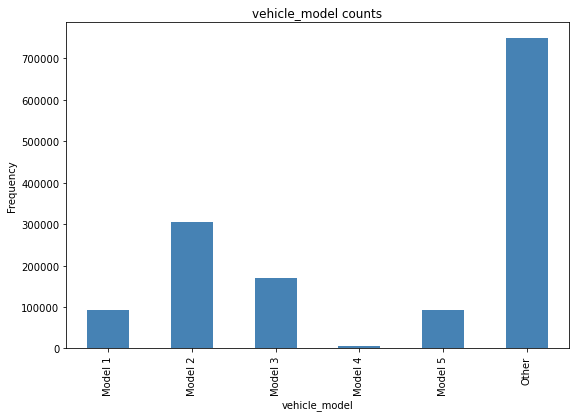

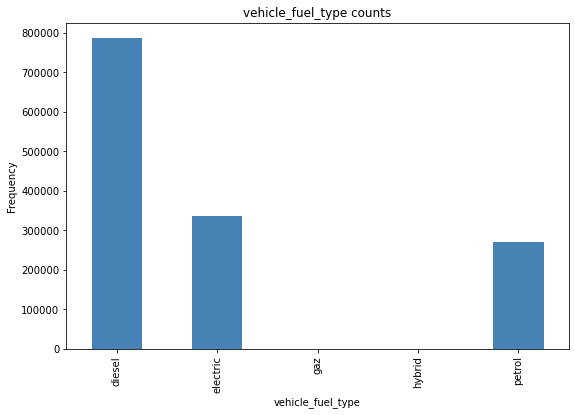

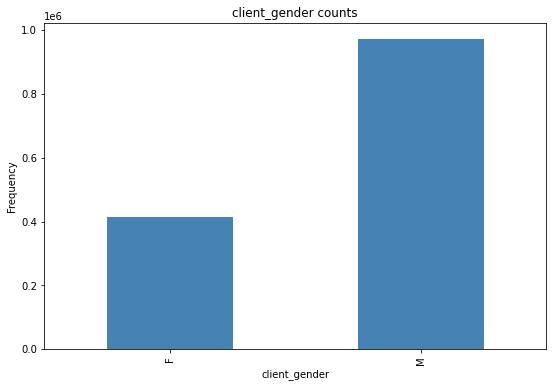

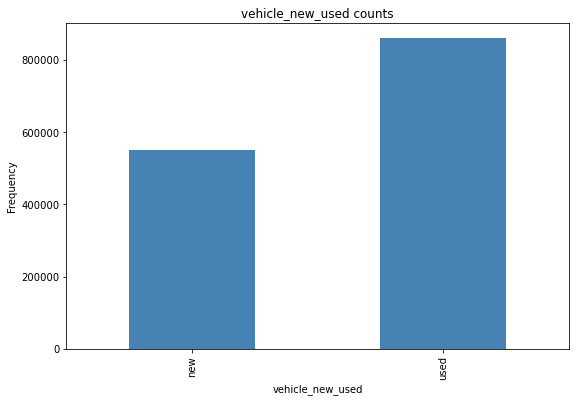

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
categorical_features = ['vehicle_model','vehicle_fuel_type','client_gender','vehicle_new_used']

for col in categorical_features:
    counts = df_ownership[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

We can also plot more complex graphs.

Below the distribution of vehicle age (in months) and vehicle mileage.

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


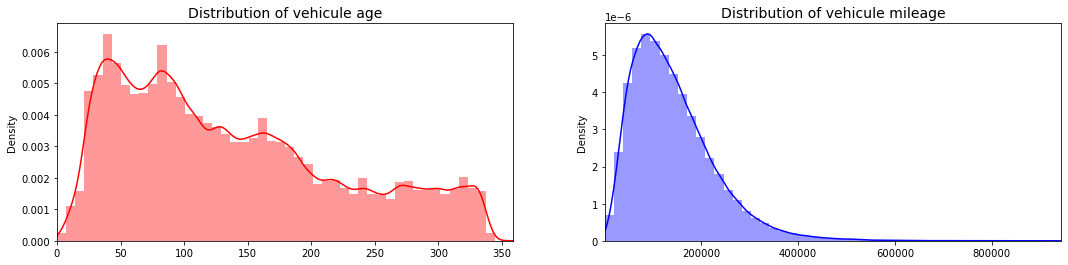

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

age_val = df_ownership['vehicle_age'].values
mileage_val = df_ownership.loc[ df_ownership.vehicle_mileage.notna() ,'vehicle_mileage'].values

sns.distplot(age_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of vehicule age', fontsize=14)
ax[0].set_xlim([min(age_val), max(age_val)])

sns.distplot(mileage_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of vehicule mileage', fontsize=14)
ax[1].set_xlim([min(mileage_val), max(mileage_val)])



plt.show()

And here the distribution of the number of electric terminals in the neighbourhood

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


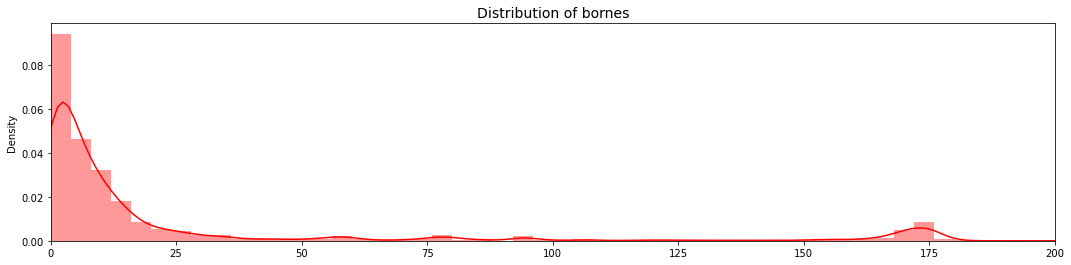

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(18,4))

borne_val = df_ownership.loc[ df_ownership.bornes_count.notna() ,'bornes_count'].values

sns.distplot(borne_val, ax=ax, color='r')
ax.set_title('Distribution of bornes', fontsize=14)
ax.set_xlim([min(borne_val), max(borne_val)])

plt.show()

Variables available in your dataset are not always enough, and you do not have to stick to them. As consultant data scientist it is also a part of your job to think about your variables, and to try to create new relevant variables from those raw variables. Of course you have to create new variables only if they make sense from a business perspective.

<b>In your opinion, what variables could be interesting to have if you want to predict if an individual will buy a new car in the next 12 months ?</b>

<b>Reminder: list of our raw data</b>
<br>client_id -–> ID corresponding to a specific client in our databases</br>
<br>client_birth_date --> date of birh</br>
<br>client_gender --> inidcates whether the client is a male or female</br>
<br>bornes_count --> number of electric terminals in the neighbourhood</br>
<br>vehicle_fuel_type --> fuel type of the vehicle: diesel, petrol, electric, hybrid, gaz</br>
<br>vehicle_new_used --> indicates whether the vehicle has been bought new or second-hand</br>
<br>vehicle_price --> price of the vehicle</br>
<br>ownership_start_date --> when client bought the vehicle</br>
<br>ownership_lapsed_date --> when the client released the vehicle (sold, scrapped, ...)</br>
<br>vehicle_age --> age of the vehicle</br>
<br>vehicle_mileage --> mileage of the vehicle</br>
<br>driven_mileage --> mileage by the current owner</br>
<br>mean_transaction_invoice --> average garage bills</br>
<br>vehicle_model --> model of the vehicle</br>

#### Lenght of ownership calculation

Before to create the variable let's check the data

In [11]:
df_ownership[['ownership_lapsed_date', 'ownership_start_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418363 entries, 0 to 1624511
Data columns (total 2 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   ownership_lapsed_date  544107 non-null   object
 1   ownership_start_date   1418363 non-null  object
dtypes: object(2)
memory usage: 32.5+ MB


We see that there is not a lapsed date in every row.

What does it mean ?

In [12]:
#create a new variable to identify current owners
df_ownership['current_ownership'] = (df_ownership['ownership_start_date'].notnull()) & (df_ownership['ownership_lapsed_date'].isnull())

In [13]:
#calculate the lenght of the last ownership in days
df_ownership['length_of_previous_ownership'] = (pd.to_datetime(df_ownership.ownership_lapsed_date) - pd.to_datetime( df_ownership.ownership_start_date)).dt.days

In [14]:
#Calculate the lenght of the current ownership in days
from datetime import date
df_ownership['ownership_current_date'] = df_ownership.ownership_lapsed_date.fillna(date.today())
df_ownership.loc[df_ownership['ownership_current_date']!= date.today(), 'ownership_current_date'] = np.nan
df_ownership['length_of_current_ownership'] = (pd.to_datetime(df_ownership.ownership_current_date) - pd.to_datetime( df_ownership.ownership_start_date)).dt.days

In [15]:
df_ownership.head()

,ownership_id,client_id,client_birth_date,client_gender,bornes_count,vehicle_fuel_type,vehicle_new_used,vehicle_price,ownership_start_date,ownership_lapsed_date,vehicle_age,vehicle_mileage,driven_mileage,mean_transaction_invoice,vehicle_model,current_ownership,length_of_previous_ownership,ownership_current_date,length_of_current_ownership
0,1001,1001,1959-07-15 00:00:00,M,1.0,diesel,new,21750.22,2014-12-17 14:41:25,2017-03-28 13:25:06,27.0,26375.953678,26555.835812,120.1500,Model 3,False,831.0,NaN,NaN
1,1002,1001,1959-07-15 00:00:00,M,1.0,diesel,new,21499.38,2011-01-31 00:00:00,NaN,95.0,118614.474233,118614.474233,246.8925,Model 3,True,NaN,2022-05-22,4129.0
2,1003,1001,1959-07-15 00:00:00,M,1.0,diesel,NaN,21750.22,2017-02-07 00:00:00,2019-09-10 09:57:10,31.0,NaN,NaN,24.0000,Model 3,False,945.0,NaN,NaN
4,1005,1003,NaN,F,1.0,diesel,new,30577.61,2015-10-09 00:00:00,NaN,38.0,79934.320487,79934.320487,303.7700,Model 5,True,NaN,2022-05-22,2417.0
5,1006,1003,NaN,F,1.0,diesel,new,28439.18,2017-02-20 00:00:00,NaN,22.0,42736.385081,42736.385081,772.8800,Model 5,True,NaN,2022-05-22,1917.0


C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


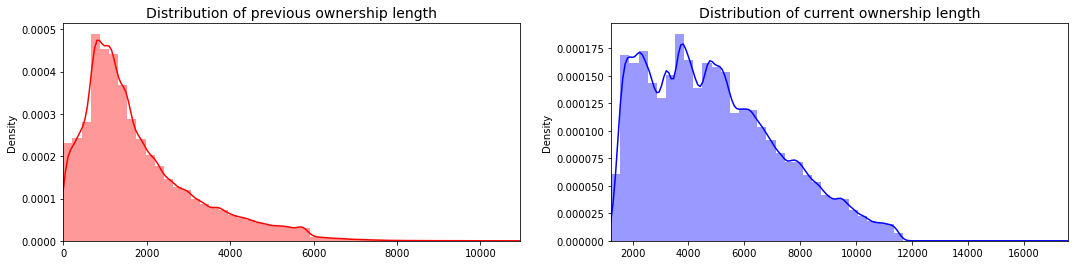

In [16]:
#plot previous and current ownership length
fig, ax = plt.subplots(1, 2, figsize=(18,4))

LPO_val = df_ownership.loc[ df_ownership.length_of_previous_ownership.notna() ,'length_of_previous_ownership'].values
LCO_val = df_ownership.loc[ df_ownership.length_of_current_ownership.notna() ,'length_of_current_ownership'].values

sns.distplot(LPO_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of previous ownership length', fontsize=14)
ax[0].set_xlim([min(LPO_val), max(LPO_val)])

sns.distplot(LCO_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of current ownership length', fontsize=14)
ax[1].set_xlim([min(LCO_val), max(LCO_val)])



plt.show()

Is this a new vehicle story?

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


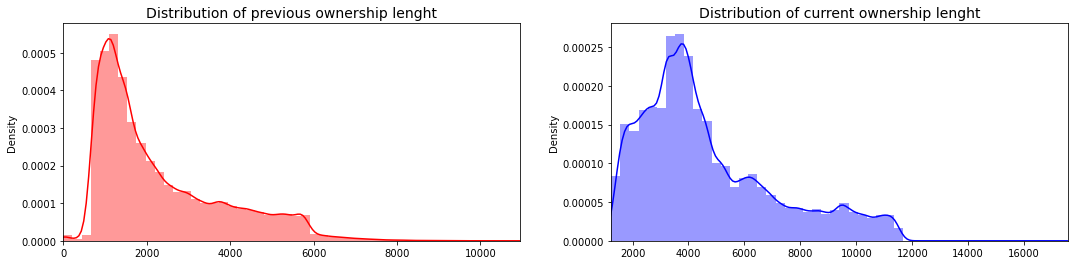

In [17]:
#plot previous and current ownership length for new cars only
data_new_cars = df_ownership.query("vehicle_new_used == 'new'")

fig, ax = plt.subplots(1, 2, figsize=(18,4))

LPO_val = data_new_cars.loc[ data_new_cars.length_of_previous_ownership.notna() ,'length_of_previous_ownership'].values
LCO_val = data_new_cars.loc[ data_new_cars.length_of_current_ownership.notna() ,'length_of_current_ownership'].values

sns.distplot(LPO_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of previous ownership lenght', fontsize=14)
ax[0].set_xlim([min(LPO_val), max(LPO_val)])

sns.distplot(LCO_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of current ownership lenght', fontsize=14)
ax[1].set_xlim([min(LCO_val), max(LCO_val)])



plt.show()

Okay. So it is important to focus only on current vehicles. So it's important to know if the data line corresponds to a new vehicle or not... 

In [18]:
df_ownership['current_vehicle_model'] = np.where(df_ownership['current_ownership'], np.nan, df_ownership['vehicle_model'])
df_ownership['current_vehicle_new_used'] = np.where(df_ownership['current_ownership'], np.nan, df_ownership['vehicle_new_used'])
df_ownership['current_vehicle_fuel_type'] = np.where(df_ownership['current_ownership'], np.nan, df_ownership['vehicle_fuel_type'])
df_ownership['current_vehicle_price'] = np.where(df_ownership['current_ownership'], np.nan, df_ownership['vehicle_price'])
df_ownership['current_vehicle_age'] = np.where(df_ownership['current_ownership'], np.nan, df_ownership['vehicle_age'])
df_ownership['current_driven_mileage'] = np.where(df_ownership['current_ownership'], np.nan, df_ownership['driven_mileage'])
df_ownership['current_vehicle_mileage'] = np.where(df_ownership['current_ownership'], np.nan, df_ownership['vehicle_mileage'])

In [19]:
df_ownership.head()

,ownership_id,client_id,client_birth_date,client_gender,bornes_count,vehicle_fuel_type,vehicle_new_used,vehicle_price,ownership_start_date,ownership_lapsed_date,...,length_of_previous_ownership,ownership_current_date,length_of_current_ownership,current_vehicle_model,current_vehicle_new_used,current_vehicle_fuel_type,current_vehicle_price,current_vehicle_age,current_driven_mileage,current_vehicle_mileage
0,1001,1001,1959-07-15 00:00:00,M,1.0,diesel,new,21750.22,2014-12-17 14:41:25,2017-03-28 13:25:06,...,831.0,NaN,NaN,Model 3,new,diesel,21750.22,27.0,26555.835812,26375.953678
1,1002,1001,1959-07-15 00:00:00,M,1.0,diesel,new,21499.38,2011-01-31 00:00:00,NaN,...,NaN,2022-05-22,4129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1003,1001,1959-07-15 00:00:00,M,1.0,diesel,NaN,21750.22,2017-02-07 00:00:00,2019-09-10 09:57:10,...,945.0,NaN,NaN,Model 3,NaN,diesel,21750.22,31.0,NaN,NaN
4,1005,1003,NaN,F,1.0,diesel,new,30577.61,2015-10-09 00:00:00,NaN,...,NaN,2022-05-22,2417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1006,1003,NaN,F,1.0,diesel,new,28439.18,2017-02-20 00:00:00,NaN,...,NaN,2022-05-22,1917.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3 - Data Processing

### Working with categorical data
We want to be able to see if the fact that the client is a man or a woman, or owned a car he bought new or used, has any impact on the probability to by a new car soon. For that machine learning algorithm need to be feed with numbers and so with numerical data. So we have to convert our categorical data into numeric data known as "dummies" through One hot encoding approach.

One hot encoding is the most widespread approach, and it works very well unless your categorical variable takes on a large number of values (i.e. you generally won't it for variables taking more than 15 different values. It'd be a poor choice in some cases with fewer values, though that varies.)

One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data. For exemple if we have a variable which can take as value Red, Yellow and Green. We can create a separate column for each possible value. Wherever the original value was Red, we put a 1 in the Red column.

In [20]:
#add columns with dummies for specified variables
df_ownership = pd.get_dummies(df_ownership, columns= ['current_vehicle_model', 'current_vehicle_fuel_type', 'current_vehicle_new_used'])

In [21]:
df_ownership.head()

,ownership_id,client_id,client_birth_date,client_gender,bornes_count,vehicle_fuel_type,vehicle_new_used,vehicle_price,ownership_start_date,ownership_lapsed_date,...,current_vehicle_model_Model 4,current_vehicle_model_Model 5,current_vehicle_model_Other,current_vehicle_fuel_type_diesel,current_vehicle_fuel_type_electric,current_vehicle_fuel_type_gaz,current_vehicle_fuel_type_hybrid,current_vehicle_fuel_type_petrol,current_vehicle_new_used_new,current_vehicle_new_used_used
0,1001,1001,1959-07-15 00:00:00,M,1.0,diesel,new,21750.22,2014-12-17 14:41:25,2017-03-28 13:25:06,...,0,0,0,1,0,0,0,0,1,0
1,1002,1001,1959-07-15 00:00:00,M,1.0,diesel,new,21499.38,2011-01-31 00:00:00,NaN,...,0,0,0,0,0,0,0,0,0,0
2,1003,1001,1959-07-15 00:00:00,M,1.0,diesel,NaN,21750.22,2017-02-07 00:00:00,2019-09-10 09:57:10,...,0,0,0,1,0,0,0,0,0,0
4,1005,1003,NaN,F,1.0,diesel,new,30577.61,2015-10-09 00:00:00,NaN,...,0,0,0,0,0,0,0,0,0,0
5,1006,1003,NaN,F,1.0,diesel,new,28439.18,2017-02-20 00:00:00,NaN,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_ownership.columns.tolist()

['ownership_id',
 'client_id',
 'client_birth_date',
 'client_gender',
 'bornes_count',
 'vehicle_fuel_type',
 'vehicle_new_used',
 'vehicle_price',
 'ownership_start_date',
 'ownership_lapsed_date',
 'vehicle_age',
 'vehicle_mileage',
 'driven_mileage',
 'mean_transaction_invoice',
 'vehicle_model',
 'current_ownership',
 'length_of_previous_ownership',
 'ownership_current_date',
 'length_of_current_ownership',
 'current_vehicle_price',
 'current_vehicle_age',
 'current_driven_mileage',
 'current_vehicle_mileage',
 'current_vehicle_model_Model 1',
 'current_vehicle_model_Model 2',
 'current_vehicle_model_Model 3',
 'current_vehicle_model_Model 4',
 'current_vehicle_model_Model 5',
 'current_vehicle_model_Other',
 'current_vehicle_fuel_type_diesel',
 'current_vehicle_fuel_type_electric',
 'current_vehicle_fuel_type_gaz',
 'current_vehicle_fuel_type_hybrid',
 'current_vehicle_fuel_type_petrol',
 'current_vehicle_new_used_new',
 'current_vehicle_new_used_used']

### Import data to predict

Now that we have the explanatory variables, we still need a base with the variable we want to predict.

In [23]:
#import tha database with purchase data
df_purchase = pd.read_csv('data\purchase_data_2019.csv', index_col = 0)

C:\Users\PC\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [24]:
df_purchase.head()

,client_id,car_bought_in_2019
0,552558,0.0
1,1588758,0.0
2,892308,0.0
3,277043,0.0
4,1356102,0.0


In [25]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244160 entries, 0 to 1244159
Data columns (total 2 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   client_id           1244160 non-null  int64  
 1   car_bought_in_2019  1244160 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 28.5 MB


In [26]:
#how many clients have bought a car in 2019 ?
df_purchase.car_bought_in_2019.value_counts()

0.0    1239091
1.0       5069
Name: car_bought_in_2019, dtype: int64

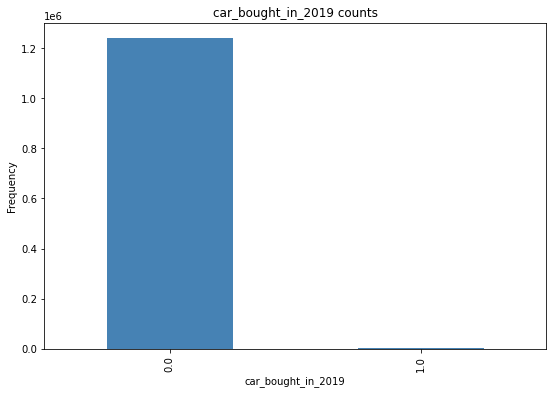

There is 5069 buying of new car in 2019


In [27]:
#plot car buyers and non buyers
counts = df_purchase['car_bought_in_2019'].value_counts().sort_index()
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
counts.plot.bar(ax = ax, color='steelblue')
ax.set_title('car_bought_in_2019' + ' counts')
ax.set_xlabel('car_bought_in_2019') 
ax.set_ylabel("Frequency")
plt.show()

print("There is " +  str(df_purchase.query('car_bought_in_2019 == 1').car_bought_in_2019.count()) + " buying of new car in 2019")

We want to be able to link this data to the one of before 2018 to be able to know which characteritics of before 2018 car owners can help to predict if people will buy a new car in the next year

In [28]:
#merge the two databases on "client_id"
df_data = pd.merge(df_ownership, df_purchase , on= 'client_id', how='left')

In [29]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1418363 entries, 0 to 1418362
Data columns (total 37 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   ownership_id                        1418363 non-null  int64  
 1   client_id                           1418363 non-null  int64  
 2   client_birth_date                   390702 non-null   object 
 3   client_gender                       1388583 non-null  object 
 4   bornes_count                        1188528 non-null  float64
 5   vehicle_fuel_type                   1392027 non-null  object 
 6   vehicle_new_used                    1410595 non-null  object 
 7   vehicle_price                       1338441 non-null  float64
 8   ownership_start_date                1418363 non-null  object 
 9   ownership_lapsed_date               544107 non-null   object 
 10  vehicle_age                         1418363 non-null  float64
 11  vehicle_mil

We can see that all rows of "car_bought_in_2019" are not null, meaning that all client_id have a match

In [30]:
df_data.car_bought_in_2019.value_counts()

0.0    1409054
1.0       9309
Name: car_bought_in_2019, dtype: int64

In [31]:
print("There is #client_id : " + str(df_data.client_id.drop_duplicates().count()))
print("There is #ownership_id "+ str(df_data.ownership_id.drop_duplicates().count()))

There is #client_id : 1244160
There is #ownership_id 1418363


### Creation of client view database

We have client with several ownership, so we need to compute a base with a ganurality at the client_id. So we want a database with one row per client_id.

E.g. : # of cars, oldest car, newest car etc...

In [32]:
client_info = ['client_id', 'client_birth_date', 'client_gender']
dict_agg = { 'vehicle_price' : ['mean'],
            'vehicle_age' : ['max'],
            'bornes_count' : ['mean', 'max'],
            'driven_mileage' : ['max'],
            'vehicle_mileage' : ['max'],
            'ownership_id' : ['count'],
            'length_of_current_ownership' : ['max', 'min'],
            'length_of_previous_ownership' : ['max'],
            'current_vehicle_price': ['max'],
            'current_vehicle_age': ['max'],
            'current_driven_mileage': ['max'],
            'current_vehicle_mileage': ['max'],
             'current_vehicle_model_Model 3': ['max'],
             'current_vehicle_model_Model 2': ['max'],
            'current_vehicle_model_Model 1': ['max'],
            'current_vehicle_model_Model 4': ['max'],
            'current_vehicle_model_Model 5': ['max'],
             'current_vehicle_fuel_type_diesel': ['max'],
             'current_vehicle_fuel_type_electric': ['max'],
             'current_vehicle_fuel_type_hybrid': ['max'],
             'current_vehicle_fuel_type_petrol': ['max'],
             'current_vehicle_new_used_new': ['max'],
            'current_ownership' : ['max'],
            'car_bought_in_2019'  : ['max']
            
}

data_client = df_data.groupby(by = client_info, dropna=True).agg(dict_agg)

In [33]:
data_client.columns = ["_".join(x) for x in data_client.columns.ravel()]
data_client.reset_index(inplace=True)

<ipython-input-33-ac486ae8963c>:1: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  data_client.columns = ["_".join(x) for x in data_client.columns.ravel()]


In [34]:
data_client.head()

,client_id,client_birth_date,client_gender,vehicle_price_mean,vehicle_age_max,bornes_count_mean,bornes_count_max,driven_mileage_max,vehicle_mileage_max,ownership_id_count,...,current_vehicle_model_Model 1_max,current_vehicle_model_Model 4_max,current_vehicle_model_Model 5_max,current_vehicle_fuel_type_diesel_max,current_vehicle_fuel_type_electric_max,current_vehicle_fuel_type_hybrid_max,current_vehicle_fuel_type_petrol_max,current_vehicle_new_used_new_max,current_ownership_max,car_bought_in_2019_max
0,1001,1959-07-15 00:00:00,M,21666.606667,95.0,1.0,1.0,118614.474233,118614.474233,3,...,0,0,0,1,0,0,0,1,True,0.0
1,1005,1954-01-17 00:00:00,M,11163.445000,273.0,2.0,2.0,NaN,NaN,2,...,0,0,0,0,0,0,0,0,True,0.0
2,1006,1968-12-25 00:00:00,M,32776.000000,137.0,2.0,2.0,NaN,NaN,3,...,0,0,0,1,0,0,0,1,False,0.0
3,1016,1938-06-26 00:00:00,M,18419.280000,36.0,1.0,1.0,20970.322581,20970.322581,1,...,0,0,0,0,0,0,0,0,True,0.0
4,1021,1962-12-10 00:00:00,M,17394.030000,70.0,4.0,4.0,NaN,NaN,1,...,0,0,0,0,0,0,0,0,True,0.0


In [35]:
data_client.columns.tolist()

['client_id',
 'client_birth_date',
 'client_gender',
 'vehicle_price_mean',
 'vehicle_age_max',
 'bornes_count_mean',
 'bornes_count_max',
 'driven_mileage_max',
 'vehicle_mileage_max',
 'ownership_id_count',
 'length_of_current_ownership_max',
 'length_of_current_ownership_min',
 'length_of_previous_ownership_max',
 'current_vehicle_price_max',
 'current_vehicle_age_max',
 'current_driven_mileage_max',
 'current_vehicle_mileage_max',
 'current_vehicle_model_Model 3_max',
 'current_vehicle_model_Model 2_max',
 'current_vehicle_model_Model 1_max',
 'current_vehicle_model_Model 4_max',
 'current_vehicle_model_Model 5_max',
 'current_vehicle_fuel_type_diesel_max',
 'current_vehicle_fuel_type_electric_max',
 'current_vehicle_fuel_type_hybrid_max',
 'current_vehicle_fuel_type_petrol_max',
 'current_vehicle_new_used_new_max',
 'current_ownership_max',
 'car_bought_in_2019_max']

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


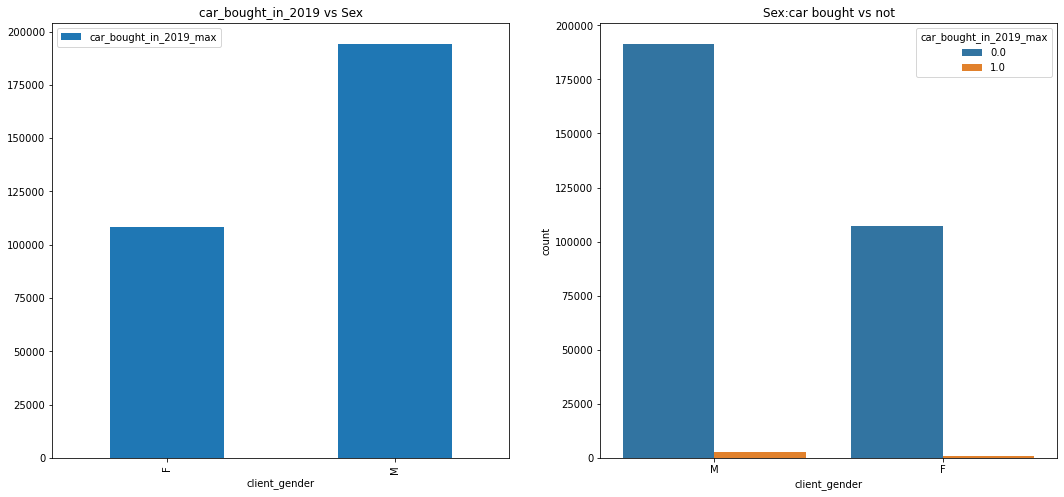

There is 3709 buying of new car in 2019


In [36]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data_client[['client_gender','car_bought_in_2019_max']].groupby(['client_gender']).count().plot.bar(ax=ax[0])
ax[0].set_title('car_bought_in_2019 vs Sex')
sns.countplot('client_gender',hue='car_bought_in_2019_max',data=data_client,ax=ax[1])
ax[1].set_title('Sex:car bought vs not')
plt.show()

print("There is " +  str(data_client.query('car_bought_in_2019_max == 1').car_bought_in_2019_max.count()) + " buying of new car in 2019")

### Working with categorical data

We want to be able to see if the fact that the client is a man or a woman, or owned a car he bought new or used, has any impact on the probability to buy a new car soon. For that machine learning algorithme need to be feed with numbers and so with numerical data. So we have to convert our categorical data into numeric data known as "dummies" through One hot encoding approach.

One hot encoding is the most widespread approach, and it works very well unless your categorical variable takes on a large number of values (i.e. you generally won't it for variables taking more than 15 different values. It'd be a poor choice in some cases with fewer values, though that varies.)

One hot encoding creates new (binary) columns, indicating the presence of each possible value from the original data.
For exemple if we have a variable which can take as value Red, Yellow and Green. We can create a separate column for each possible value. Wherever the original value was Red, we put a 1 in the Red column.

In [37]:
data_client = pd.get_dummies(data_client, columns= ['client_gender'])

To simplify the analysis we will remove all client on which we do not have any info on the milage of the car and no current car

In [38]:
data_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302453 entries, 0 to 302452
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   client_id                               302453 non-null  int64  
 1   client_birth_date                       302453 non-null  object 
 2   vehicle_price_mean                      293092 non-null  float64
 3   vehicle_age_max                         302453 non-null  float64
 4   bornes_count_mean                       271309 non-null  float64
 5   bornes_count_max                        271309 non-null  float64
 6   driven_mileage_max                      113512 non-null  float64
 7   vehicle_mileage_max                     113512 non-null  float64
 8   ownership_id_count                      302453 non-null  int64  
 9   length_of_current_ownership_max         277779 non-null  float64
 10  length_of_current_ownership_min         2777

In [39]:
data_client.dropna(subset = ['driven_mileage_max'], how='any', inplace = True)
print("There is " +  str(data_client.query('car_bought_in_2019_max == 1').car_bought_in_2019_max.count()) + " remaining buying of new car in 2019")

There is 2477 remaining buying of new car in 2019


In this scenario, our subsample will be a dataframe with a 50/50 ratio of buyers and non-buyers. Meaning our sub-sample will have the same amount of client with a purchase in 2019 and client without.

#### Why do we create a sub-Sample?

In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe will cause the following issues:
- Overfitting: Our classification models will assume that in most cases there are no purchase of a car! What we want for our model is to be certain when there will be one.
- Wrong Correlations: Although we don't know what the "V" features stand for, it will be useful to understand how each of this features influence the result (new car bought or not) by having an imbalance dataframe we are not able to see the true correlations between the class and features.

#### What will happen if we try to do a scoring algorithm without any resampling?

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import KFold, StratifiedKFold

print('No purchase', round(data_client['car_bought_in_2019_max'].value_counts()[0]/len(data_client) * 100,2), '% of the dataset')
print('Purchase', round(data_client['car_bought_in_2019_max'].value_counts()[1]/len(data_client) * 100,2), '% of the dataset')

No purchase 97.82 % of the dataset
Purchase 2.18 % of the dataset


### Random Under-Sampling

In [41]:
data_client.car_bought_in_2019_max.value_counts()

0.0    111035
1.0      2477
Name: car_bought_in_2019_max, dtype: int64

In [42]:
nb_purchase = data_client.car_bought_in_2019_max.value_counts()[1]

In [43]:
data_client = data_client.sample(frac=1)

# amount of fraud classes 5069 rows.
purchase_df = data_client.loc[data_client['car_bought_in_2019_max'] == 1]
print(purchase_df.shape)
non_purchase_df = data_client.loc[data_client['car_bought_in_2019_max'] == 0][:nb_purchase]

normal_distributed_df = pd.concat([purchase_df, non_purchase_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

(2477, 30)


,client_id,client_birth_date,vehicle_price_mean,vehicle_age_max,bornes_count_mean,bornes_count_max,driven_mileage_max,vehicle_mileage_max,ownership_id_count,length_of_current_ownership_max,...,current_vehicle_model_Model 5_max,current_vehicle_fuel_type_diesel_max,current_vehicle_fuel_type_electric_max,current_vehicle_fuel_type_hybrid_max,current_vehicle_fuel_type_petrol_max,current_vehicle_new_used_new_max,current_ownership_max,car_bought_in_2019_max,client_gender_F,client_gender_M
229810,1152642,1927-11-18 00:00:00,9763.690000,45.0,9.0,9.0,25962.155732,25962.155732,1,2382.0,...,0,0,0,0,0,0,True,0.0,1,0
180379,904536,1967-04-16 00:00:00,17719.280000,30.0,26.0,26.0,77056.407004,74988.756080,1,NaN,...,0,1,0,0,0,1,False,0.0,1,0
222260,1115215,1968-09-15 00:00:00,22331.950000,45.0,2.0,2.0,183537.944213,182862.231113,1,2621.0,...,0,0,0,0,0,0,True,0.0,1,0
96357,485349,1955-03-04 00:00:00,16428.170000,78.0,8.0,8.0,72542.805362,72542.805362,2,3617.0,...,0,0,0,0,0,1,True,1.0,0,1
219116,1099867,1960-03-11 00:00:00,15084.516667,45.0,0.0,0.0,52573.551724,52573.551724,3,2630.0,...,0,1,0,0,1,1,True,1.0,0,1


Distribution of the Classes in the subsample dataset
0.0    0.5
1.0    0.5
Name: car_bought_in_2019_max, dtype: float64


C:\Users\PC\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


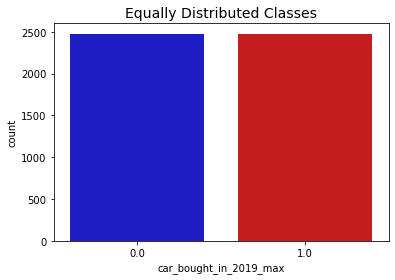

In [44]:
colors = ["#0101DF", "#DF0101"]

print('Distribution of the Classes in the subsample dataset')
print(new_df['car_bought_in_2019_max'].value_counts()/len(new_df))

sns.countplot('car_bought_in_2019_max', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

# 4 - Data Modeling

## First modeling

Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a client will purchase a car. However, it is important that we use the correct dataframe (subsample) in order for us to see which features have a high positive or negative correlation with regards to new car purchase.

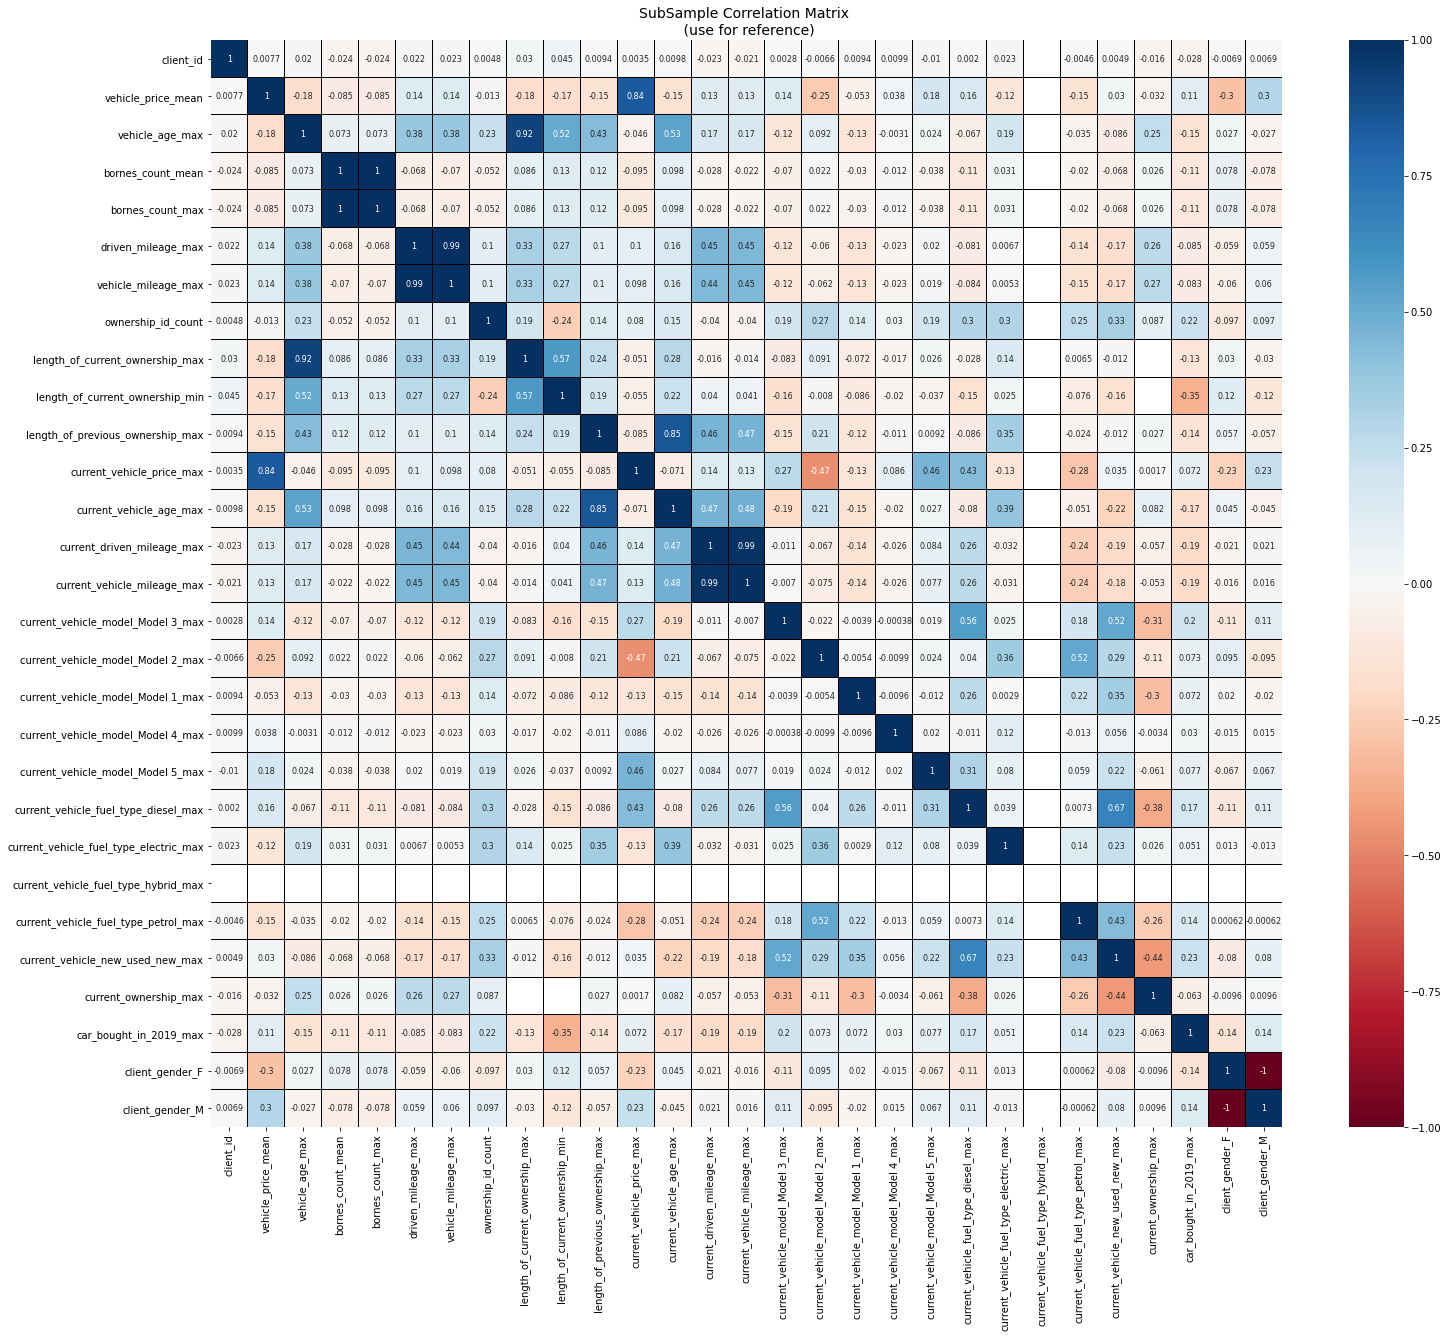

In [45]:
# Make sure we use the client data sub sample in our correlation

f, ax = plt.subplots(1, 1, figsize=(24,20))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='RdBu', annot_kws={'size':8}, ax=ax, linecolor='black', annot = True, linewidths = 0.01)
ax.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

**You look at those variables that have a higher correlation with your prediction variable**

Client gender is interesting since it is correlated with bought vehicle and it has negative correlation with the other predictor variables

Most correlated variable to be tested:
- ownership_id_count
- vehicle_price_mean
- length_of_current_ownership_min
- current_vehicle_price_max
- current_vehicle_model_Model 3_max
- current_vehicle_fuel_type_diesel_max
- current_vehicle_new_used_new_max
- client_gender_M

In [46]:
data_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113512 entries, 52880 to 222160
Data columns (total 30 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   client_id                               113512 non-null  int64  
 1   client_birth_date                       113512 non-null  object 
 2   vehicle_price_mean                      113443 non-null  float64
 3   vehicle_age_max                         113512 non-null  float64
 4   bornes_count_mean                       102528 non-null  float64
 5   bornes_count_max                        102528 non-null  float64
 6   driven_mileage_max                      113512 non-null  float64
 7   vehicle_mileage_max                     113512 non-null  float64
 8   ownership_id_count                      113512 non-null  int64  
 9   length_of_current_ownership_max         104511 non-null  float64
 10  length_of_current_ownership_min         

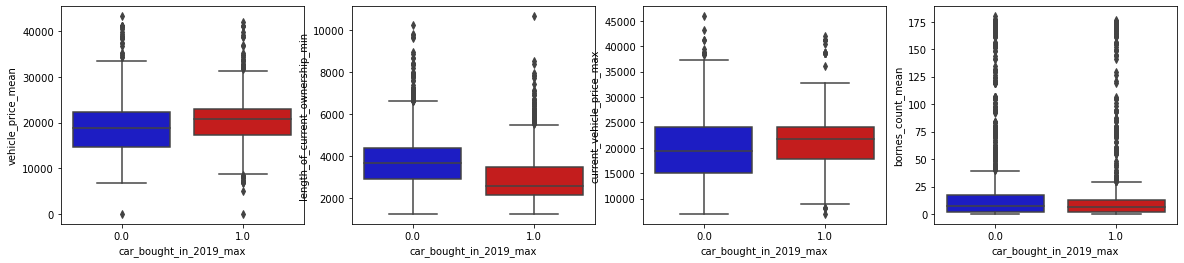

In [47]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

sns.boxplot(x="car_bought_in_2019_max", y="vehicle_price_mean", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('')


sns.boxplot(x="car_bought_in_2019_max", y="length_of_current_ownership_min", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('')


sns.boxplot(x="car_bought_in_2019_max", y="current_vehicle_price_max", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('')

sns.boxplot(x="car_bought_in_2019_max", y="bornes_count_mean", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('')


plt.show()

## Anomaly Detection

Our main aim in this section is to remove "extreme outliers" from features that have a high correlation with our classes. This will have a positive impact on the accuracy of our models.

Interquartile Range Method
<ul> <li> Interquartile Range (IQR): We calculate this by the difference between the 75th percentile and 25th percentile. Our aim is to create a threshold beyond the 75th and 25th percentile that in case some instance pass this threshold the instance will be deleted.</li>
<li> Boxplots: Besides easily seeing the 25th and 75th percentiles (both end of the squares) it is also easy to see extreme outliers (points beyond the lower and higher extreme).</li> </ul>

Outlier Removal Tradeoff:
We have to be careful as to how far do we want the threshold for removing outliers. We determine the threshold by multiplying a number (ex: 1.5) by the (Interquartile Range). The higher this threshold is, the less outliers will detect (multiplying by a higher number ex: 3), and the lower this threshold is the more outliers it will detect.

<b>The Tradeoff </b>: The lower the threshold the more outliers it will remove however, we want to focus more on "extreme outliers" rather than just outliers. Why? because we might run the risk of information loss which will cause our models to have a lower accuracy. You can play with this threshold and see how it affects the accuracy of our classification models.

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


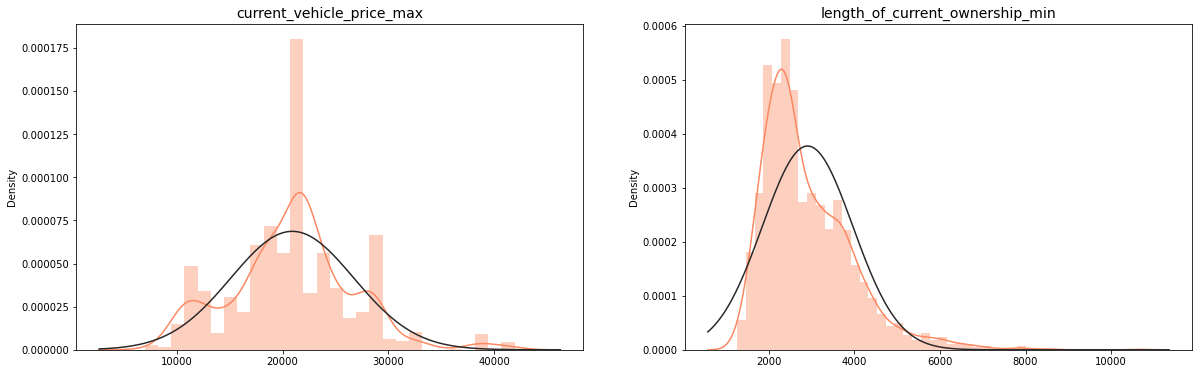

In [48]:
from scipy.stats import norm

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

v1_purchase_dist = new_df['current_vehicle_price_max'].loc[(new_df['car_bought_in_2019_max'] == 1) & (new_df['current_vehicle_price_max'].notna())].values
sns.distplot(v1_purchase_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('current_vehicle_price_max', fontsize=14)

v2_purchase_dist = new_df['length_of_current_ownership_min'].loc[(new_df['car_bought_in_2019_max'] == 1) & (new_df['length_of_current_ownership_min'].notna())].values
sns.distplot(v2_purchase_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('length_of_current_ownership_min', fontsize=14)

plt.show()


In [49]:
# # -----> V1 Removing Outliers (Highest Negative Correlated with Labels)
v1_purchase = new_df['vehicle_age_max'].loc[new_df['car_bought_in_2019_max'] == 1].values
q25, q75 = np.percentile(v1_purchase, 25), np.percentile(v1_purchase, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v1_iqr = q75 - q25
print('iqr: {}'.format(v1_iqr))

v1_cut_off = v1_iqr * 1.5
v1_lower, v1_upper = q25 - v1_cut_off, q75 + v1_cut_off
print('Cut Off: {}'.format(v1_cut_off))
print('V1 Lower: {}'.format(v1_lower))
print('V1 Upper: {}'.format(v1_upper))

outliers = [x for x in v1_purchase if x < v1_lower or x > v1_upper]
print('Feature V1 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V1 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['vehicle_age_max'] > v1_upper) | (new_df['vehicle_age_max'] < v1_lower)].index)
print('----' * 44)

# # -----> V2 Removing Outliers (Highest Negative Correlated with Labels)
v2_purchase = new_df['vehicle_mileage_max'].loc[(new_df['car_bought_in_2019_max'] == 1)& (new_df['vehicle_mileage_max'].notna())].values
q25, q75 = np.percentile(v2_purchase, 25), np.percentile(v2_purchase, 75)
print('Quartile 25: {} | Quartile 75: {}'.format(q25, q75))
v2_iqr = q75 - q25
print('iqr: {}'.format(v2_iqr))

v2_cut_off = v2_iqr * 1.5
v2_lower, v2_upper = q25 - v2_cut_off, q75 + v2_cut_off
print('Cut Off: {}'.format(v2_cut_off))
print('V1 Lower: {}'.format(v2_lower))
print('V1 Upper: {}'.format(v2_upper))

outliers = [x for x in v2_purchase if x < v2_lower or x > v2_upper]
print('Feature V2 Outliers for Fraud Cases: {}'.format(len(outliers)))
print('V2 outliers:{}'.format(outliers))

new_df = new_df.drop(new_df[(new_df['vehicle_mileage_max'] > v2_upper) | (new_df['vehicle_mileage_max'] < v2_lower)].index)
print('----' * 44)

Quartile 25: 47.0 | Quartile 75: 103.0
iqr: 56.0
Cut Off: 84.0
V1 Lower: -37.0
V1 Upper: 187.0
Feature V1 Outliers for Fraud Cases: 155
V1 outliers:[239.0, 230.0, 330.0, 327.0, 308.0, 259.0, 249.0, 217.0, 190.0, 212.0, 316.0, 208.0, 220.0, 230.0, 209.0, 227.0, 272.0, 261.0, 190.0, 242.0, 285.0, 248.0, 253.0, 320.0, 206.0, 255.0, 220.0, 224.0, 196.0, 262.0, 320.0, 190.0, 190.0, 270.0, 189.0, 300.0, 283.0, 236.0, 202.0, 203.0, 190.0, 240.0, 295.0, 254.0, 281.0, 220.0, 296.0, 203.0, 279.0, 326.0, 328.0, 190.0, 231.0, 240.0, 239.0, 199.0, 271.0, 334.0, 212.0, 241.0, 245.0, 215.0, 323.0, 226.0, 253.0, 213.0, 219.0, 212.0, 314.0, 197.0, 188.0, 214.0, 307.0, 190.0, 198.0, 266.0, 310.0, 193.0, 260.0, 214.0, 222.0, 211.0, 274.0, 253.0, 275.0, 268.0, 274.0, 277.0, 231.0, 264.0, 253.0, 204.0, 230.0, 238.0, 332.0, 238.0, 236.0, 196.0, 222.0, 305.0, 207.0, 298.0, 296.0, 301.0, 309.0, 221.0, 202.0, 216.0, 197.0, 324.0, 212.0, 283.0, 221.0, 303.0, 264.0, 216.0, 286.0, 288.0, 247.0, 265.0, 328.0, 261.

C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


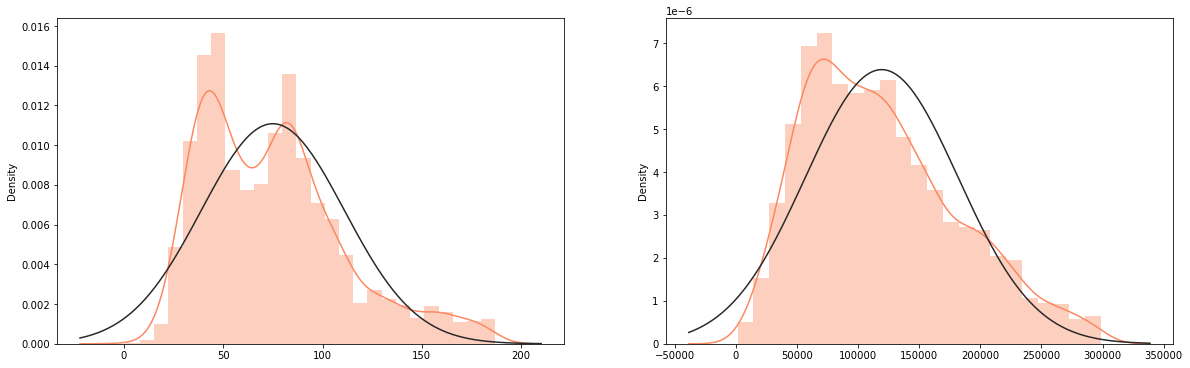

In [50]:
from scipy.stats import norm

f, (ax1, ax2) = plt.subplots(1,2, figsize=(20, 6))

v1_purchase_dist = new_df['vehicle_age_max'].loc[new_df['car_bought_in_2019_max'] == 1].values
sns.distplot(v1_purchase_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('', fontsize=14)

v2_purchase_dist = new_df['vehicle_mileage_max'].loc[(new_df['car_bought_in_2019_max'] == 1) & (new_df['vehicle_mileage_max'].notna())].values
sns.distplot(v2_purchase_dist,ax=ax2, fit=norm, color='#FB8861')
ax2.set_title('', fontsize=14)

plt.show()

In this section we will train a model to try to predict which client will by a new car or not. Before we have to split our data into training and testing sets and separate the features from the labels.

In [51]:
new_df.head()

,client_id,client_birth_date,vehicle_price_mean,vehicle_age_max,bornes_count_mean,bornes_count_max,driven_mileage_max,vehicle_mileage_max,ownership_id_count,length_of_current_ownership_max,...,current_vehicle_model_Model 5_max,current_vehicle_fuel_type_diesel_max,current_vehicle_fuel_type_electric_max,current_vehicle_fuel_type_hybrid_max,current_vehicle_fuel_type_petrol_max,current_vehicle_new_used_new_max,current_ownership_max,car_bought_in_2019_max,client_gender_F,client_gender_M
229810,1152642,1927-11-18 00:00:00,9763.690000,45.0,9.0,9.0,25962.155732,25962.155732,1,2382.0,...,0,0,0,0,0,0,True,0.0,1,0
180379,904536,1967-04-16 00:00:00,17719.280000,30.0,26.0,26.0,77056.407004,74988.756080,1,NaN,...,0,1,0,0,0,1,False,0.0,1,0
222260,1115215,1968-09-15 00:00:00,22331.950000,45.0,2.0,2.0,183537.944213,182862.231113,1,2621.0,...,0,0,0,0,0,0,True,0.0,1,0
96357,485349,1955-03-04 00:00:00,16428.170000,78.0,8.0,8.0,72542.805362,72542.805362,2,3617.0,...,0,0,0,0,0,1,True,1.0,0,1
219116,1099867,1960-03-11 00:00:00,15084.516667,45.0,0.0,0.0,52573.551724,52573.551724,3,2630.0,...,0,1,0,0,1,1,True,1.0,0,1


List = 
- ownership_id_count
- vehicle_price_mean
- length_of_current_ownership_min
- current_vehicle_price_max
- current_vehicle_model_Model 3_max
- current_vehicle_fuel_type_diesel_max
- current_vehicle_new_used_new_max
- client_gender_M

In [52]:
columns_to_test = ['ownership_id_count', 'length_of_current_ownership_min', 'current_vehicle_price_max', 'current_vehicle_model_Model 3_max', 'current_vehicle_fuel_type_diesel_max', 'current_vehicle_new_used_new_max', 'client_gender_M']
new_df_model = new_df[['car_bought_in_2019_max'] + columns_to_test]

In [53]:
new_df_model.head()

,car_bought_in_2019_max,ownership_id_count,length_of_current_ownership_min,current_vehicle_price_max,current_vehicle_model_Model 3_max,current_vehicle_fuel_type_diesel_max,current_vehicle_new_used_new_max,client_gender_M
229810,0.0,1,2382.0,NaN,0,0,0,0
180379,0.0,1,NaN,17719.28,0,1,1,0
222260,0.0,1,2621.0,NaN,0,0,0,0
96357,1.0,2,3617.0,17302.62,0,0,1,1
219116,1.0,3,2630.0,19425.80,0,1,1,1


In [54]:
new_df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 229810 to 201883
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   car_bought_in_2019_max                4468 non-null   float64
 1   ownership_id_count                    4468 non-null   int64  
 2   length_of_current_ownership_min       3975 non-null   float64
 3   current_vehicle_price_max             1473 non-null   float64
 4   current_vehicle_model_Model 3_max     4468 non-null   uint8  
 5   current_vehicle_fuel_type_diesel_max  4468 non-null   uint8  
 6   current_vehicle_new_used_new_max      4468 non-null   uint8  
 7   client_gender_M                       4468 non-null   uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 192.0 KB


We exclude the price of the current vehicle because we do not have enough data

In [55]:
new_df_model.drop('current_vehicle_price_max', axis = 1, inplace = True)
new_df_model.dropna(how='any', inplace=True)

C:\Users\PC\Anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
C:\Users\PC\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


We replace null by average value

In [56]:
# Undersampling before cross validating (prone to overfit)
X = new_df_model.drop('car_bought_in_2019_max', axis=1)
y = new_df_model['car_bought_in_2019_max']

In [57]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [59]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [60]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn. metrics import classification_report
from sklearn.metrics import accuracy_score

Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on probability; so what actually gets predicted by a binary classifier is the probability that the label is true (P(y)) and the probability that the label is false (1 - P(y)). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (P(y) > 0.5) or a 0 (P(y) <= 0.5). You can use the predict_proba method to see the probability pairs for each case:

In [61]:
scores = log_reg.predict_proba(X_test)
print(scores)

[[0.61932257 0.38067743]
 [0.45701679 0.54298321]
 [0.56864656 0.43135344]
 ...
 [0.32801641 0.67198359]
 [0.72624198 0.27375802]
 [0.37879896 0.62120104]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the true positive rate (which is another name for recall) and the false positive rate for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a received operator characteristic (ROC) chart, like this:

In [62]:
predictions = log_reg.predict(X_test)
print(predictions)

[0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0.

In [63]:
print('Actual labels:    ' ,y_test)

Actual labels:     [1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1

The classification report includes the following metrics for each class  (0 and 1)

> note that the header row may not line up with the values!

* *Precision*: Of the predictions the model made for this class, what proportion were correct?
* *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

Because this is a *binary* classification problem, the ***1*** class is considered *positive* and its precision and recall are particularly interesting - these in effect answer the questions:

- Of all the client the model predicted are potential buyers, how many are actually buyers in 2019?
- Of all the client that are actually buyers in 2019, how many did the model identify?

You can retrieve these values on their own by using the **precision_score** and **recall_score** metrics in scikit-learn (which by default assume a binary classification model).

In [64]:
print('Accuracy: ', accuracy_score(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Accuracy:  0.6918238993710691
Overall Precision: 0.698170731707317
Overall Recall: 0.6106666666666667


The precision and recall metrics are derived from four possible prediction outcomes:
* *True Positives*: The predicted label and the actual label are both 1.
* *False Positives*: The predicted label is 1, but the actual label is 0.
* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *True Negatives*: The predicted label and the actual label are both 0.

These metrics are generally tabulated for the test set and shown together as a *confusion matrix*, which takes the following form:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

In [65]:
# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[321  99]
 [146 229]]


The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])

In [67]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)

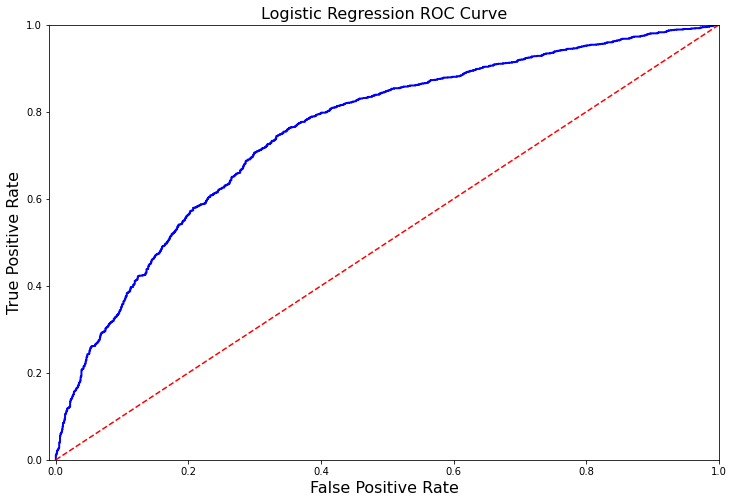

In [68]:
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In general, we can have multiple predictor variables in a logistic regression model.

logit(p) = log(p/(1-p))= β0 + β1*x1 + … + βk*xk

Each exponentiated coefficient is the ratio of two odds, or the change in odds in the multiplicative scale for a unit increase in the corresponding predictor variable holding other variables at certain value.

In [69]:
for col, coef in zip(columns_to_test, log_reg.coef_.tolist()[0]) :
    print(col +" : " + str(coef))

ownership_id_count : 0.6456162244697051
length_of_current_ownership_min : -0.0004221858727384453
current_vehicle_price_max : 0.07118239074700061
current_vehicle_model_Model 3_max : 0.10102501202878332
current_vehicle_fuel_type_diesel_max : 0.12046560808868108
current_vehicle_new_used_new_max : 0.1482608268632516


## Normaly we have to normalize our variables

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve

In [71]:
scaler = StandardScaler()
scaler = scaler.fit(X)
new_data = scaler.transform(X)
new_data = pd.DataFrame(new_data, columns = X.columns)

In [72]:
new_data.head()

,ownership_id_count,length_of_current_ownership_min,current_vehicle_model_Model 3_max,current_vehicle_fuel_type_diesel_max,current_vehicle_new_used_new_max,client_gender_M
0,-0.477372,-0.775371,-0.324646,-0.464324,-0.490942,-1.549304
1,-0.477372,-0.564040,-0.324646,-0.464324,-0.490942,-1.549304
2,0.122360,0.316655,-0.324646,-0.464324,2.036901,0.645451
3,0.722092,-0.556082,-0.324646,2.153671,2.036901,0.645451
4,0.722092,-0.567577,-0.324646,-0.464324,-0.490942,0.645451


In [73]:
# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

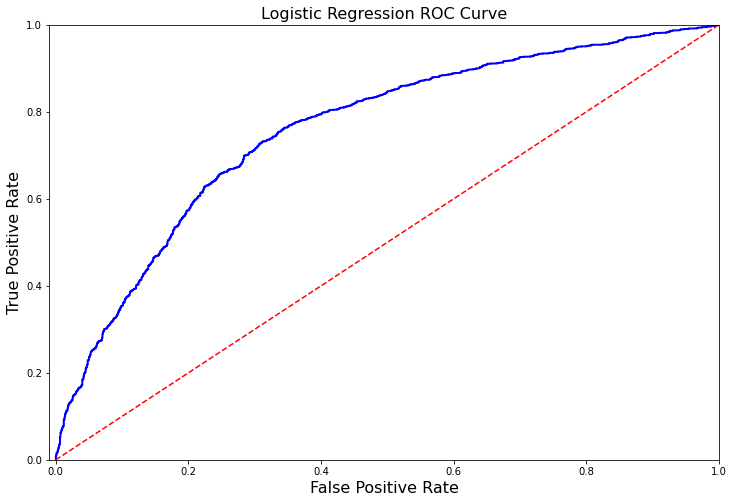

In [74]:
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [75]:
for col, coef in zip(columns_to_test, log_reg.coef_.tolist()[0]) :
    print(col +" : " + str(coef))

ownership_id_count : 0.7557993405996818
length_of_current_ownership_min : -0.6410074853206972
current_vehicle_price_max : 0.1492772269009599
current_vehicle_model_Model 3_max : -0.05286561070482583
current_vehicle_fuel_type_diesel_max : 0.11205085319274084
current_vehicle_new_used_new_max : 0.14136505596874016


In [76]:
predictions = log_reg.predict(X_test)

In [77]:
print('Accuracy: ', accuracy_score(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

Accuracy:  0.7295597484276729
Overall Precision: 0.7127659574468085
Overall Recall: 0.7146666666666667
[[312 108]
 [107 268]]


### Try a different algorithm

Now let's try a different algorithm. Previously we used a logistic regression algorithm, which is a *linear* algorithm. There are many kinds of classification algorithm we could try, including:

- **Support Vector Machine algorithms**: Algorithms that define a *hyperplane* that separates classes.
- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction
- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.

Look here for more information : https://scikit-learn.org/stable/
#Googleisyourbestfriend

In [78]:
from sklearn.svm import SVC
# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2, random_state=42)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

model = SVC()
model.fit(X_train, y_train)

SVC()

In [79]:
predictions = model.predict(X_test)

In [80]:
print('Accuracy: ', accuracy_score(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

Accuracy:  0.7220125786163522
Overall Precision: 0.6868932038834952
Overall Recall: 0.7546666666666667
[[291 129]
 [ 92 283]]


## Decision tree

In [81]:
from sklearn import tree

model_tree = tree.DecisionTreeClassifier()

model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
predictions = model_tree.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

Accuracy:  0.6238993710691824
Overall Precision: 0.6032608695652174
Overall Recall: 0.592
[[274 146]
 [153 222]]


## Random forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
model_randomforest = RandomForestClassifier(n_estimators=100)
model_randomforest.fit(X_train, y_train)

predictions = model_randomforest.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

Accuracy:  0.6452830188679245
Overall Precision: 0.6220472440944882
Overall Recall: 0.632
[[276 144]
 [138 237]]


## Adaboost Classifier

In [84]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=100)
model_ada.fit(X_train, y_train)

predictions = model_ada.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

Accuracy:  0.7157232704402515
Overall Precision: 0.6997319034852547
Overall Recall: 0.696
[[308 112]
 [114 261]]


## Neural network

In [85]:
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model_rn.fit(X_train, y_train)
predictions = model_rn.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, predictions))

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

Accuracy:  0.7283018867924528
Overall Precision: 0.6943765281173594
Overall Recall: 0.7573333333333333
[[295 125]
 [ 91 284]]


C:\Users\PC\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
